# Academic Stress Level

**About Dataset** :<br>
dataset berasal dari kaggle dengan judul "Student Academic Stress Real World Dataset" dapat di liat dari link berikut https://www.kaggle.com/datasets/poushal02/student-academic-stress-real-world-dataset

# 1. Import Library
- Mengimpor pustaka yang dibutuhkan seperti pandas, numpy, matplotlib, seaborn, scikit-learn, dll.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# 2. Load Data
- Membaca dataset dari sumbernya (.csv, .xlsx, database, API, dsb).
- Contoh: pd.read_csv("data.csv").

In [2]:
# Load Data csv
df = pd.read_csv("academic_stress_level.csv")

# 3. Data Understanding (Explorasi Awal)
- Melihat bentuk data (```.head()```, ```.info()```, ```.describe()```).
- Mengecek tipe data, jumlah kolom/baris, dan distribusi nilai.

In [3]:
# Melihat 5 baris pertama dataset
df.head(5)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [4]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [5]:
# Menampilkan deskripsi dari data numerik 
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [6]:
# menampilkan shape data
df.shape

(140, 9)

In [7]:
df.nunique()

Timestamp                                                              140
Your Academic Stage                                                      3
Peer pressure                                                            5
Academic pressure from your home                                         5
Study Environment                                                        3
What coping strategy you use as a student?                               3
Do you have any bad habits like smoking, drinking on a daily basis?      3
What would you rate the academic  competition in your student life       5
Rate your academic stress index                                          5
dtype: int64

# 4. Data Cleaning (Pembersihan Data)
- Menangani missing values.
- Mengatasi duplikasi data.
- Menyesuaikan tipe data (numerik, kategori, datetime).
- Membersihkan nilai outlier bila diperlukan.

In [8]:
# Menhapus column yang tidak relevan
df = df.drop(columns=["Timestamp"])

In [9]:
# Melihat data yang  terindikasi null atau kosong
print(df.isnull().sum())

Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64


In [10]:
# menghitung berapa persen data yang terindikasi kosong
missing_values = (df.isnull().sum() / len(df)) * 100
print(missing_values)

Your Academic Stage                                                    0.000000
Peer pressure                                                          0.000000
Academic pressure from your home                                       0.000000
Study Environment                                                      0.714286
What coping strategy you use as a student?                             0.000000
Do you have any bad habits like smoking, drinking on a daily basis?    0.000000
What would you rate the academic  competition in your student life     0.000000
Rate your academic stress index                                        0.000000
dtype: float64


In [11]:
# Mengatasi Nilai kosong
df = df.dropna()

# Mengisi values dengan nilai rata rata
#df.fillna(df.mean(), inplace=True) # untuk numerikal
#df.fillna(df.mode().iloc[0], inplace=True) # untuk categorikal

# cek kembali missing values
df.isna().sum()

Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      0
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [12]:
# melihat data yang terindikasi duplikat
df.duplicated().sum()

np.int64(8)

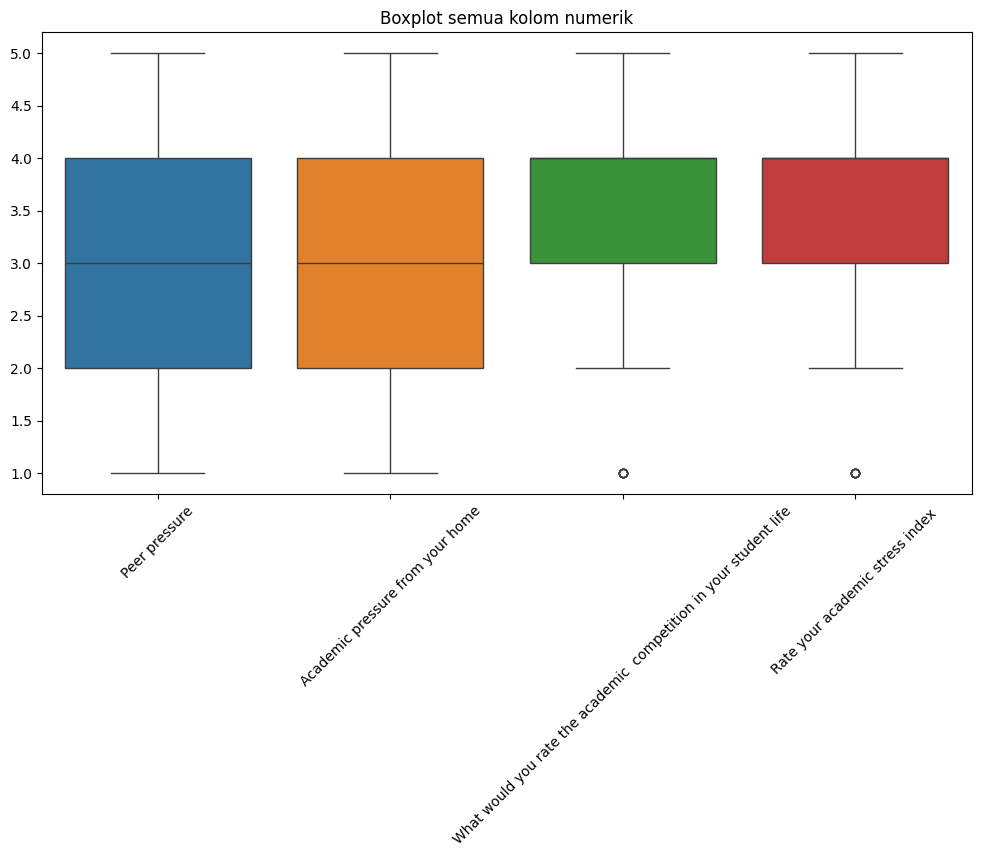

In [13]:
# mengecek data outliers dengan boxplot 
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=45)
plt.title("Boxplot semua kolom numerik")
plt.show()

In [ ]:
# Cek outliers dengan IQR
Q1 = numeric_df.quantile(0.25, numeric_only=True)
Q3 = numeric_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers pada kolom numerik
outliers = ((numeric_df < lower_bound) | (numeric_df> upper_bound)).sum()

# Memfilter data yang bukan outliers
df_no_outliers = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

# Menampilkan jumlah data outliers
print("Jumlah data awal : ", len(df))
print("Jumlah data bersih : ", len(df_no_outliers))
print("jumlah data outliers : ", len(df) - len(df_no_outliers))

Jumlah data awal :  139
Jumlah data bersih :  132
jumlah data outliers :  7


# 5. Data Transformation / Preprocessing
- Encoding variabel kategorikal (Label Encoding, One-Hot Encoding).
- Normalisasi atau standarisasi data numerik.
- Feature engineering (membuat fitur baru dari data yang ada).

In [15]:
# Ambil kolom kategorikal
category_cols = df_no_outliers.select_dtypes(include="object").columns

# One-hot encoding
df_encoded = pd.get_dummies(df_no_outliers, columns=category_cols)

df_encoded

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_high school,Your Academic Stage_post-graduate,Your Academic Stage_undergraduate,Study Environment_Noisy,Study Environment_Peaceful,Study Environment_disrupted,What coping strategy you use as a student?_Analyze the situation and handle it with intellect,What coping strategy you use as a student?_Emotional breakdown (crying a lot),"What coping strategy you use as a student?_Social support (friends, family)","Do you have any bad habits like smoking, drinking on a daily basis?_No","Do you have any bad habits like smoking, drinking on a daily basis?_Yes","Do you have any bad habits like smoking, drinking on a daily basis?_prefer not to say"
0,4,5,3,5,False,False,True,True,False,False,True,False,False,True,False,False
1,3,4,3,3,False,False,True,False,True,False,True,False,False,True,False,False
2,1,1,2,4,False,False,True,False,True,False,False,False,True,True,False,False
3,3,2,4,3,False,False,True,False,True,False,True,False,False,True,False,False
4,3,3,4,5,False,False,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,3,2,3,4,False,False,True,False,True,False,True,False,False,True,False,False
136,4,2,3,3,False,False,True,False,False,True,True,False,False,True,False,False
137,3,3,2,4,False,False,True,False,True,False,True,False,False,True,False,False
138,4,5,5,5,False,False,True,False,False,True,False,False,True,True,False,False


# 6. Exploratory Data Analysis (EDA)
- Visualisasi distribusi data (histogram, boxplot, scatter plot, heatmap).
- Analisis korelasi antar fitur.
- Menemukan pola, tren, atau anomali.

In [44]:
numeric_col = df_encoded.select_dtypes(include="number").columns
x = df_encoded[numeric_col]
print(x.describe())
from scipy.stats import skew, kurtosis
print("skew:", skew(x), "kurtosis:", kurtosis(x))

       Peer pressure  Academic pressure from your home  \
count     132.000000                        132.000000   
mean        3.121212                          3.227273   
std         1.034004                          1.251508   
min         1.000000                          1.000000   
25%         3.000000                          2.000000   
50%         3.000000                          3.000000   
75%         4.000000                          4.000000   
max         5.000000                          5.000000   

       What would you rate the academic  competition in your student life  \
count                                         132.000000                    
mean                                            3.598485                    
std                                             0.898343                    
min                                             2.000000                    
25%                                             3.000000                    
50%            

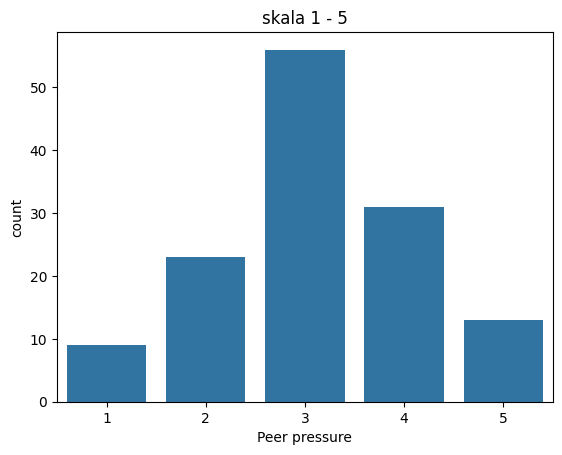

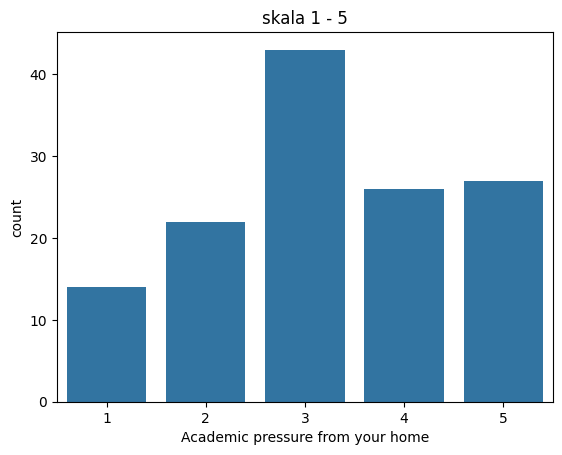

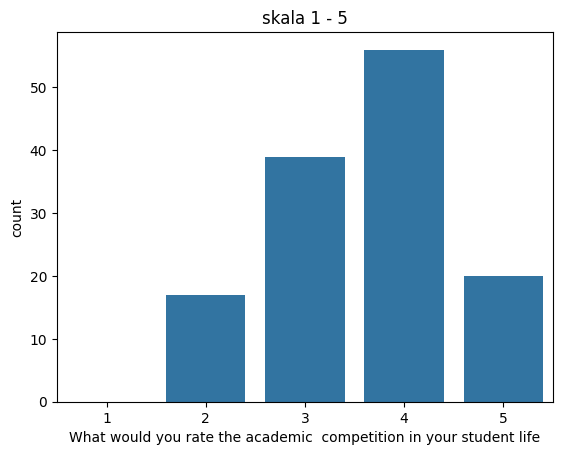

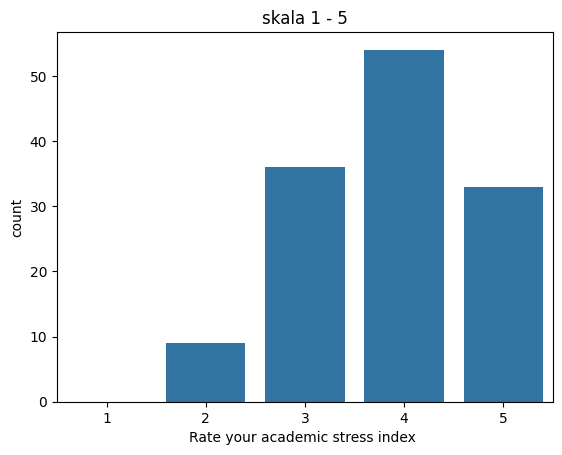

In [46]:
for col in numeric_col:
    plt.Figure(figsize=(5,3))
    sns.countplot(x=col, data=df_encoded, order=[1,2,3,4,5])
    plt.title("skala 1 - 5")
    plt.show()

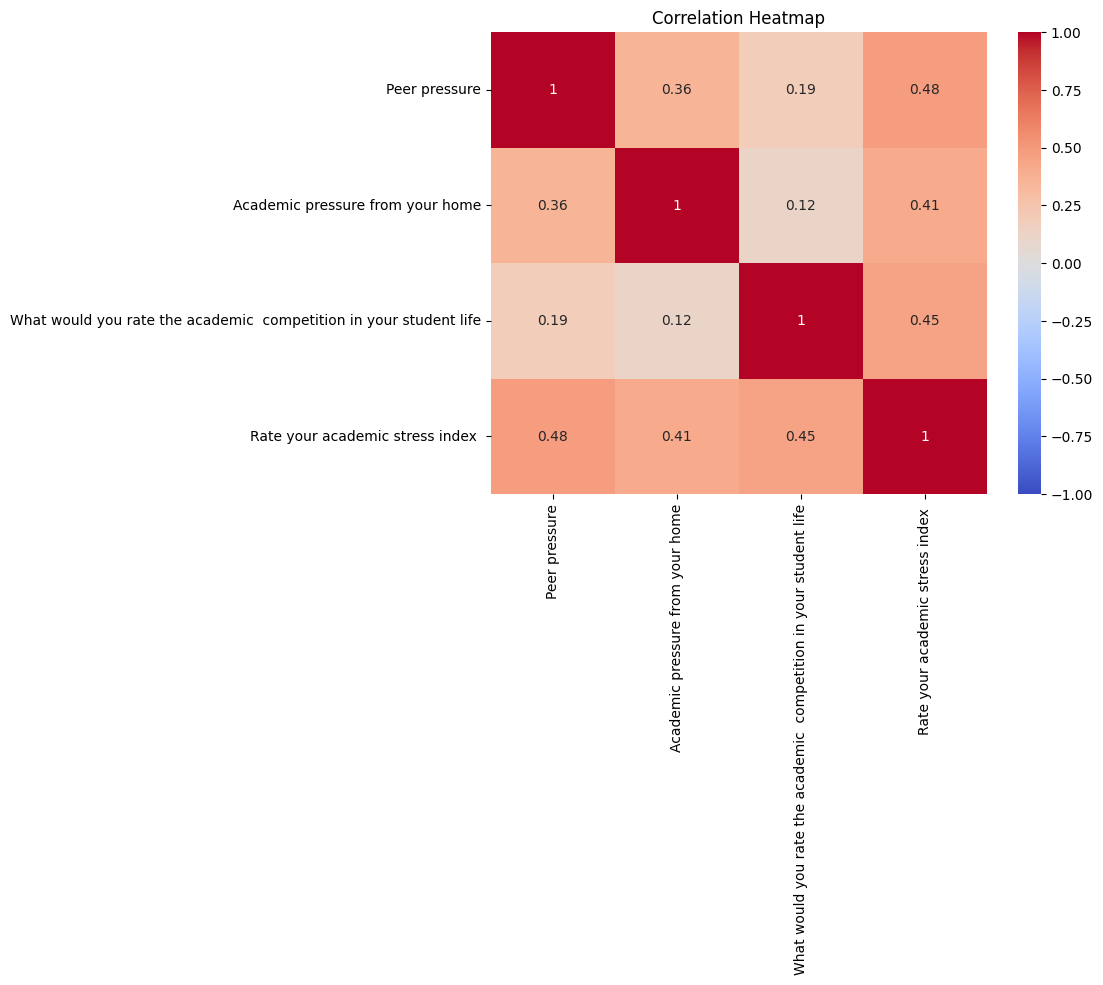

In [57]:
# hitung korelasi antar kolom numerik
corr = df.select_dtypes(include=['number']).corr()

# buat heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# 7. Modeling
- Split data (train-test split).
- Membangun model machine learning.
- Melatih model pada data train.

# 8. Evaluasi Model (opsional, jika ada modeling)
- Mengukur performa model (akurasi, precision, recall, F1, RMSE, dll).
- Cross-validation atau hyperparameter tuning.

# 9. Interpretasi Hasil
- Menjelaskan insight dari analisis (pola penting, variabel yang berpengaruh, tren, dll).

# 10. Visualisasi Akhir & Kesimpulan
- Membuat grafik/plot yang mudah dipahami.
- Menuliskan kesimpulan, insight, atau rekomendasi.